[![DOI](https://zenodo.org/badge/940091341.svg)](https://doi.org/10.5281/zenodo.14939868) <a href="https://www.globh2e.org.au/"><img src="https://img.shields.io/badge/ARC:Funding%20number-IC200100023-blue.svg"/></a>

# **Technology choice model**
<!-- **<div style="text-align: left; font-size: 19px;"> Prospective life cycle assessment data generation**</div> -->

<div style="text-align: left; font-size: 16px;">Michaël Lejeune<sup>a,b</sup>, Sami Kara<sup>a,b</sup>, Michael Zwicky Hauschild<sup>c,d</sup>, Sareh Sharabifarahni<sup>a</sup>, Rahman Daiyan<sup>b,e</sup></div><br>

<div style="text-align: left; font-size: 13px;"><sup>a</sup>Sustainability in Manufacturing and Life Cycle Engineering Research Group, School of Mechanical and Manufacturing Engineering, the University of New South Wales, 2052, Sydney, Australia</div>

<div style="text-align: left; font-size: 13px;">
<sup>b</sup>Australian Research Council Training Centre for the Global Hydrogen Economy (GlobH2e), the University of New South Wales, 2052, Sydney, Australia</div>

<div style="text-align: left; font-size: 13px;">
<sup>c</sup>Centre for Absolute Sustainability, Technical University of Denmark, Kgs, Lyngby, Denmark</div>

<div style="text-align: left; font-size: 13px;">
<sup>d</sup>Division for Quantitative Sustainability Assessment (QSA), Department of Environmental and Resource Engineering, Technical University of Denmark, Kgs, Lyngby, Denmark</div>

<div style="text-align: left; font-size: 13px;">
<sup>e</sup>School of Minerals and Energy Engineering, The University of New South Wales, Sydney 2052, Australia</div><br>

<div style="text-align: left; font-size: 13px;"> Code developer and maintainer:<a href="mailto:m.lejeune@unsw.edu.au"> Michaël Lejeune</div></a><br>


# **1. Introduction**

In [30]:
include("./Utils/1_00_utils.jl")
include("./Utils/3_03_utils.jl")
include("./Utils/3_00_utils.jl")
include("./lca/src/lca.jl")

using .LCAModule
using JuMP, CPLEX,Distributions
using PyPlot

Setting rcParams
["#f94144", "#f3722c", "#f8961e", "#f9844a", "#f9c74f", "#90be6d", "#43aa8b", "#4d908e", "#577590", "#277da1"]
Setting rcParams
["#f94144", "#f3722c", "#f8961e", "#f9844a", "#f9c74f", "#90be6d", "#43aa8b", "#4d908e", "#577590", "#277da1"]


# **2. Background**

In this section, we demonstrate how the technology choice model operates to provide a comprehensive understanding of its structure and functionality. We utilize the model from Bachmann et al.†, as it offers a clear and systematic framework for readers to grasp the key concepts. The model is adapted to suit the specific requirements of this study.

## **2.1 Review of the different optimisation models**

$$
\min_{\text{s.t.}\ s} Z = \boldsymbol{k^T F s} 
\tag{1}
$$

$$
\boldsymbol{As=f} 
\tag{2}
$$


$$
\boldsymbol{s^*\geq 0} 
\tag{3}
$$

$$
\boldsymbol{F s \leq c} 
\tag{4}
$$

Bachmann et al. 2023

$$
\min_{\text{s.t.}\ s} PF_{CC} = \boldsymbol{q_{CC}^T B s} 
\tag{1}
$$

$$
\boldsymbol{As=f} 
\tag{2}
$$


$$
\boldsymbol{s\geq 0} 
\tag{3}
$$

$$
\boldsymbol{d \leq c} 
\tag{4}
$$

Letchemberg et al. 2024

$$
\min_{s, \text{slack}} w^T z
\tag{1}
$$

$$
A s = f + \text{slack}
\tag{2}
$$

$$
s^{\text{low}} \leq s \leq s^{\text{high}}
\tag{3}
$$

$$
0 \leq \text{slack} \leq \text{slack}^{\text{high}}
\tag{4}
$$

$$
z = Q B s
\tag{5}
$$

$$
z \leq z^{\text{high}}
\tag{6}
$$

$$
B s \leq b^{\text{high}}
\tag{7}
$$


In this resar

$$
\min_{\text{s.t.}\ s} \ \boldsymbol{x  = \Gamma d} 
\tag{1}
$$


$$
\boldsymbol{d = \left(\Lambda s\right)\oslash \omega = \left(Q B s\right)\oslash \omega}
\tag{2}
$$

$$
\boldsymbol{A s = f}
\tag{2}
$$

$$
\boldsymbol{s^* \geq 0}
\tag{2}
$$

$$
\boldsymbol{F s \leq c}
\tag{2}
$$

$$
\boldsymbol{x \leq x^{\text{high}}}
\tag{2}
$$

$$
\boldsymbol{Bs \leq g^{\text{high}}}
\tag{2}
$$


# **3. Rice farming case study**

## **3.0 Data curation**

In [31]:
b = 1:length(processes) # here n refers to the columns of matrix A, which are the processes involved. 
α = 1e-5 # allocation factor
ω = α*Δxᵖᵇ


9-element Vector{Float64}:
 1.0e-5
 6.88e-6
 1.1e-6
 0.04
 0.0001
 0.00039700000000000005
 0.000145
 0.00025
 0.0001

## **3.1 Optimisation**

### **3.1.1 Balanced optimsation**

In [32]:
model = Model(CPLEX.Optimizer)
set_silent(model)

# Variables and expressions
@variable(model, 𝐬[1:length(processes)])

@expression(model, 𝐠, B*𝐬)
@expression(model, 𝐝, (Q*𝐠)./ω)
@expression(model, 𝐱, 𝐝)

@objective(model, Min, 𝐱);
@constraint(model, 𝐬 ≥ 0)
@constraint(model, A * 𝐬 == f)
@constraint(model, F * 𝐬 ≤ c)
optimize!(model);
    if !is_solved_and_feasible(model)
        error("Solver did not find an optimal solution")
    end
# solution_summary(model)
DataFrame(hcat([catnames_ticks,value.(𝐝),value.(𝐱)]...),["Boundaries","𝐝", "𝐱"])


Row,Boundaries,𝐝,𝐱
,Any,Any,Any
1,Climate change Energy imbalance,6.96625,6.96625
2,Ocean acidification,2.0358,2.0358
3,Atmospheric aerosol loading,1.53578,1.53578
4,Freshwater use,11.5039,11.5039
5,Biogeochemical flows-P,2.62543,2.62543
6,Biogeochemical flows-N,2.89673,2.89673
7,Stratospheric ozone depletion,0.19364,0.19364
8,Land-system change,0.00215625,0.00215625
9,Biosphere Integrity,8.70691,8.70691


### **3.1.2 Climate change oriented optimisation**

In [33]:
modelᶜᶜ = Model(CPLEX.Optimizer);
set_silent(modelᶜᶜ)

@variable(modelᶜᶜ, 0 ≤ 𝐬ᶜᶜ[1:length(processes)])

@expression(modelᶜᶜ, 𝐠, B*𝐬ᶜᶜ)
@expression(modelᶜᶜ, 𝐝ᶜᶜ, Q[1,:]'*𝐠./ω)
@expression(modelᶜᶜ, 𝐱ᶜᶜ, 𝐝ᶜᶜ)

@objective(modelᶜᶜ, Min, 𝐱ᶜᶜ)
@constraint(modelᶜᶜ , A * 𝐬ᶜᶜ == f) 
@constraint(modelᶜᶜ , F * 𝐬ᶜᶜ ≤ c)

# @constraint(modelᶜᶜ , ((Λ°[7,:]'*𝐬ᶜᶜ)/ω[7]) ≤ 6)

optimize!(modelᶜᶜ);
solution_summary(model)
𝐬°ᶜᶜ= value.(𝐬ᶜᶜ)
𝐝°ᶜᶜ = value.(𝐝ᶜᶜ)
𝐱°ᶜᶜ = value.(𝐱ᶜᶜ)
DataFrame(hcat([catnames_ticks,𝐝°ᶜᶜ,𝐱°ᶜᶜ]...),["Boundaries","𝐝ᶜᶜ", "𝐱ᶜᶜ"])


Row,Boundaries,𝐝ᶜᶜ,𝐱ᶜᶜ
,Any,Any,Any
1,Climate change Energy imbalance,5.34475,5.34475
2,Ocean acidification,7.76853,7.76853
3,Atmospheric aerosol loading,48.5886,48.5886
4,Freshwater use,0.00133619,0.00133619
5,Biogeochemical flows-P,0.534475,0.534475
6,Biogeochemical flows-N,0.134628,0.134628
7,Stratospheric ozone depletion,0.368603,0.368603
8,Land-system change,0.21379,0.21379
9,Biosphere Integrity,0.534475,0.534475


### **3.1.3 optimisation with informed by biophysical interactions**

#### **3.1.3.1 Regular optimisation**

In [34]:
modelᵦ = Model(CPLEX.Optimizer)
set_silent(modelᵦ)

@variable(modelᵦ, 0 ≤ 𝐬ᵦ[1:length(processes)])

@expression(modelᵦ, 𝐠,  B*𝐬ᵦ)
@expression(modelᵦ, 𝐝ᵦ, Q*𝐠./ω)
@expression(modelᵦ, 𝐱ᵦ, 𝚪ᵦ * 𝐝ᵦ)

@constraint(modelᵦ, A * 𝐬ᵦ == f)
@constraint(modelᵦ, F * 𝐬ᵦ ≤ c)

@objective(modelᵦ, Min, 𝐱ᵦ)
optimize!(modelᵦ)
solution_summary(modelᵦ)

DataFrame(hcat(catnames_ticks,[value.(i) for i ∈ [𝐝ᵦ,𝐱ᵦ]]...),["Boundaries","𝐝ᵦ", "𝐱ᵦ"])


Row,Boundaries,𝐝ᵦ,𝐱ᵦ
,Any,Any,Any
1,Climate change Energy imbalance,6.96625,18.0368
2,Ocean acidification,2.0358,4.2602
3,Atmospheric aerosol loading,1.53578,2.43069
4,Freshwater use,11.5039,9.86227
5,Biogeochemical flows-P,2.62543,8.94915
6,Biogeochemical flows-N,2.89673,8.94915
7,Stratospheric ozone depletion,0.19364,-0.799079
8,Land-system change,0.00215625,1.80584
9,Biosphere Integrity,8.70691,21.6452


#### **3.1.3.2 Stochastic optimisation**

In [35]:

@load "../Source data/02_results//1_00_total_human_impact/data_interaction_param_matrices.jld2" δ𝐁


1-element Vector{Symbol}:
 :δ𝐁

In [44]:
σω = 0.001 .* abs.(ω) # standard deviation for the perturbed vector ω
σB= 0.001 .* abs.(B) # standard deviation for the perturbed matrix B°
σF= 0.001 .* abs.(F) # standard deviation for the perturbed matrix F°
σA= 0.001 .* abs.(A) # standard deviation for the perturbed matrix A°
σf = 0.001 .* abs.(f) # standard deviation for the perturbed vector f
σc = 0.001 .* abs.(c) # standard deviation for the perturbed vector c

N = 10000
s_res=zeros(length(processes),N);
d_res=zeros(length(boundaries),N);
x_res=zeros(length(boundaries),N);


In [58]:
for k ∈ 1:N

    modelᵦ = Model(CPLEX.Optimizer)
    set_silent(modelᵦ)
    𝚪ᵦ°= Matrix(𝐈-matformat(rand.(δ𝐁)))^-1 #FIXME: uncertainties
    ω°= rand.(TriangularDist.(ω.*0.8, ω.*1.2,ω))
    A°= rand.(Normal.(A, σA)) # A shouldn't change, 
    B°= rand.(Normal.(B, σB))
    F°= rand.(Normal.(F, σF))
    f°= rand.(Normal.(f, σf))
    c°= rand.(Normal.(c, σc))

    # Decision variable
    @variable(modelᵦ, 0 ≤ 𝐬ᵦ[1:length(processes)])

    # Expressions (equalities)
    @expression(modelᵦ, 𝐠ᵦ, B°*𝐬ᵦ)
    @expression(modelᵦ, 𝐝ᵦ, (Q*𝐠ᵦ)./ω°)
    @expression(modelᵦ, 𝐱ᵦ, 𝚪ᵦ * 𝐝ᵦ)

    # Expressions (Constraints on the decision variable)
    @constraint(modelᵦ, A° * 𝐬ᵦ .== f°)
    @constraint(modelᵦ, F° * 𝐬ᵦ .≤ c°)

    # Objective function: Minimising the state of control variables
    @objective(modelᵦ, Min, 𝐱ᵦ)    
    optimize!(modelᵦ)
    if !is_solved_and_feasible(modelᵦ)
        error("Solver did not find an optimal solution")
    end

    # extract values to store stochastic results
    d_res[:,k] = value.(𝐝ᵦ)
    s_res[:,k] = value.(𝐬ᵦ)
    x_res[:,k] = value.(𝐱ᵦ)
end
# solution_summary(modelᵦ)


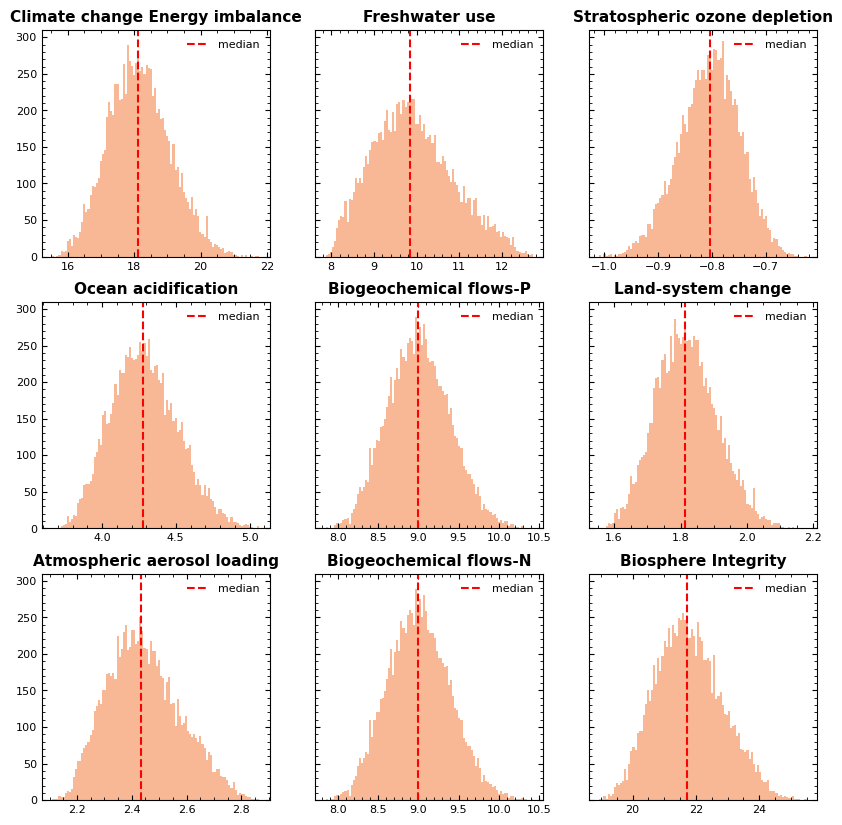

In [63]:
fig, axs = subplots(3,3,figsize=(10,10),sharey=true)
for i in 1:9
    axs[i].hist(x_res[i,:], bins=100, alpha=0.5)
    axs[i].axvline(median(x_res[i,:]), color="red", linestyle="--", label="median")

    axs[i].set_title(catnames_ticks[i])
    axs[i].legend(frameon=false)
end
# display(plt.gcf())


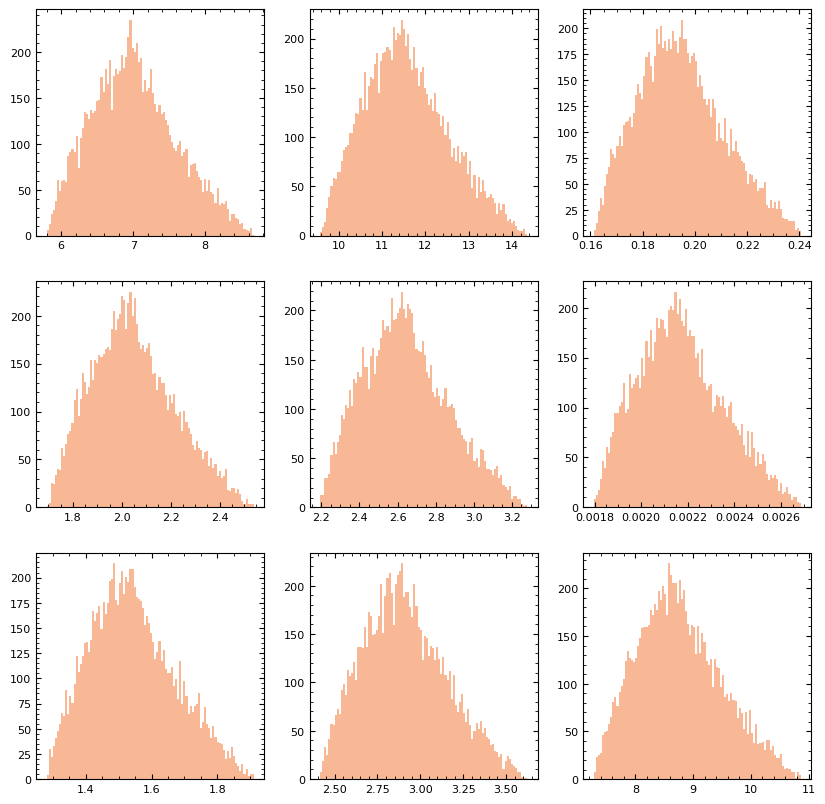

In [68]:
fig, axs = subplots(3,3,figsize=(10,10))
for i in 1:9
    axs[i].hist(d_res[i,:], bins=100, alpha=0.5)
end
# display(plt.gcf())


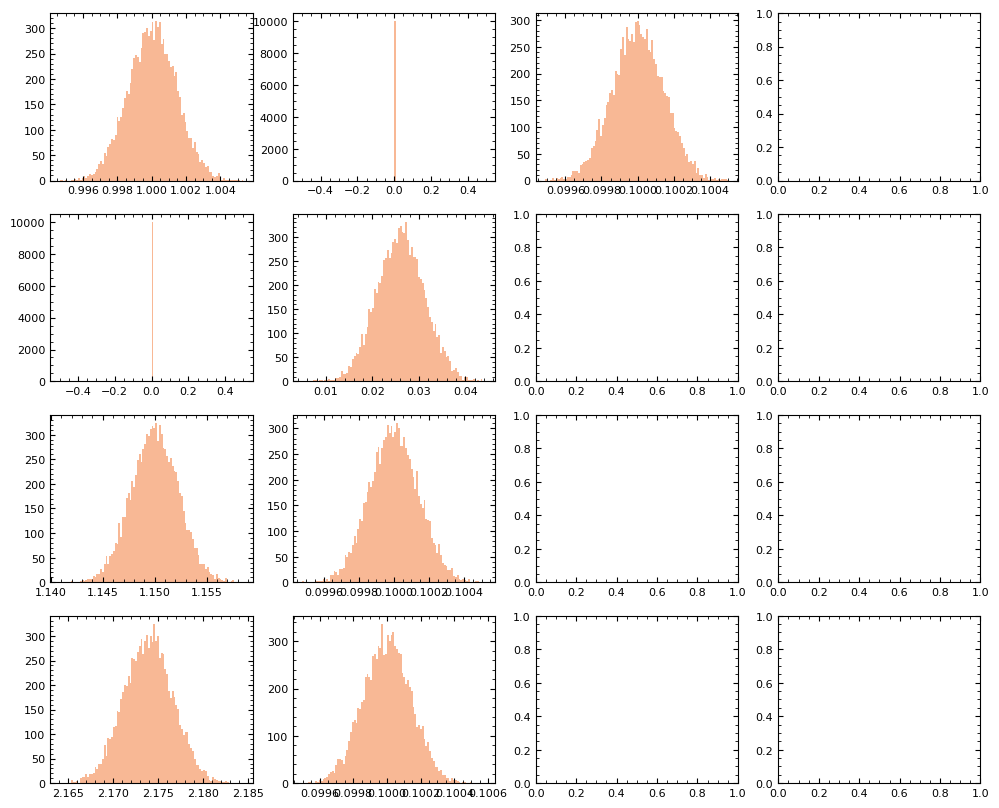

In [69]:
fig, axs = subplots(4,4,figsize=(12,10))
for i in 1:9
    axs[i].hist(s_res[i,:], bins=100, alpha=0.5)
end
# display(plt.gcf())


### **3.1.4 Optimisation with informed by biophysical+human-mediated interactions**

In [123]:
modelₕ = Model(CPLEX.Optimizer);
set_silent(modelₕ)

@variable(modelₕ, 0≤ 𝐬ₕ[1:length(processes)])

@expression(modelₕ, 𝐠ₕ, B*𝐬ₕ)
@expression(modelₕ, 𝐝ₕ, (Q*𝐠ₕ)./ω)
@expression(modelₕ, 𝐱ₕ, 𝚪ₕ * 𝐝ₕ)

@objective(modelₕ, Min, 𝐱ₕ)
@constraint(modelₕ, A * 𝐬ₕ == f) 
@constraint(modelₕ, F * 𝐬ₕ ≤ c)
optimize!(modelₕ);
# solution_summary(modelₕ)
DataFrame(hcat(catnames_ticks,[value.(i) for i ∈ [𝐝ₕ,𝐱ₕ]]...),["Boundaries","𝐝ₕ", "𝐱ₕ"])


Row,Boundaries,𝐝ₕ,𝐱ₕ
,Any,Any,Any
1,Climate change Energy imbalance,6.96625,21.4789
2,Ocean acidification,2.0358,7.69237
3,Atmospheric aerosol loading,1.53578,2.70776
4,Freshwater use,11.5039,10.4143
5,Biogeochemical flows-P,2.62543,11.7198
6,Biogeochemical flows-N,2.89673,11.7198
7,Stratospheric ozone depletion,0.19364,-0.977894
8,Land-system change,0.00215625,3.77611
9,Biosphere Integrity,8.70691,25.3999


## **3.2. Results**

### **3.2.1 System analysis**

In [68]:
S=Set([𝐬,𝐬ᶜᶜ,𝐬ᵦ,𝐬ₕ])
DataFrame(hcat([processes,[value.(i) for i ∈ S]...]...),["processes","s", "sᶜᶜ", "sᵦ","sₕ"])



Row,processes,s,sᶜᶜ,sᵦ,sₕ
,Any,Any,Any,Any,Any
1,Rice factory,1.0,1.0,1.0,1.0
2,Rice farming,1.15,0.0,0.0,0.0
3,Low-nitrogen,0.0,1.15,1.15,1.15
4,Rice husk boiler,2.17391,2.17391,2.17391,2.17391
5,Natural gas boiler,0.0,0.0,0.0,0.0
6,Wood pellet boiler,0.026087,0.026087,0.026087,0.026087
7,Rice husk collection 1,0.1,0.1,0.1,0.1
8,Rice husk collection 2,0.1,0.1,0.1,0.1
9,Rice husk collection 3,0.1,0.1,0.1,0.1


### **3.2.2 Direct human impact**

In [63]:
S=[𝐝,𝐝ᶜᶜ,𝐝ᵦ,𝐝ₕ]
DataFrame(hcat([catnames_ticks,[value.(i) for i ∈ S]...]...),["processes","𝐝","𝐝ᶜᶜ","𝐝ᵦ","𝐝ₕ"])


Row,processes,𝐝,𝐝ᶜᶜ,𝐝ᵦ,𝐝ₕ
,Any,Any,Any,Any,Any
1,Climate change Energy imbalance,6.96625,5.34475,6.96625,6.96625
2,Ocean acidification,2.0358,7.76853,2.0358,2.0358
3,Atmospheric aerosol loading,1.53578,48.5886,1.53578,1.53578
4,Freshwater use,11.5039,0.00133619,11.5039,11.5039
5,Biogeochemical flows-P,2.62543,0.534475,2.62543,2.62543
6,Biogeochemical flows-N,2.89673,0.134628,2.89673,2.89673
7,Stratospheric ozone depletion,0.19364,0.368603,0.19364,0.19364
8,Land-system change,0.00215625,0.21379,0.00215625,0.00215625
9,Biosphere Integrity,8.70691,0.534475,8.70691,8.70691


### **3.2.3 State of plenatary bondaries**

In [64]:
S=[𝐱,𝐱ᶜᶜ,𝐱ᵦ,𝐱ₕ]
DataFrame(hcat([catnames_ticks,[value.(i) for i ∈ S]...]...),["processes","𝐱","𝐱ᶜᶜ","𝐱ᵦ","𝐱ₕ"])


Row,processes,𝐱,𝐱ᶜᶜ,𝐱ᵦ,𝐱ₕ
,Any,Any,Any,Any,Any
1,Climate change Energy imbalance,6.96625,5.34475,18.0368,21.4789
2,Ocean acidification,2.0358,7.76853,4.2602,7.69237
3,Atmospheric aerosol loading,1.53578,48.5886,2.43069,2.70776
4,Freshwater use,11.5039,0.00133619,9.86227,10.4143
5,Biogeochemical flows-P,2.62543,0.534475,8.94915,11.7198
6,Biogeochemical flows-N,2.89673,0.134628,8.94915,11.7198
7,Stratospheric ozone depletion,0.19364,0.368603,-0.799079,-0.977894
8,Land-system change,0.00215625,0.21379,1.80584,3.77611
9,Biosphere Integrity,8.70691,0.534475,21.6452,25.3999


# **4. How to construct a Technology choice model**

## **4.1 From linear algebra**

In [ ]:
initProject("natcom",model="REMIND",RCP=1.9,SSP=1,year=2025,method="Planetary boundaries")


We can get the matrices as follows

In [ ]:
𝐀=Technosphere!().Matrix
𝐁=Biosphere!().Matrix
Q=Characterisation!().Matrix


# **References**